In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du [site Web du Réseau Sentinelles](https://www.sentiweb.fr/france/fr/?). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [3]:
data_url ='https://www.sentiweb.fr/datasets/incidence-PAY-7.csv'

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant skiprows=1.

Nous testons d'abord si aucun fichier local est présent et si ce n'est pas le cas, nous fabriquons ce fichier local. le but est d'éviter d'avoir des problème si les données présentes sur le site d'origine venait à être modifiée. Les données utilisées pour l'étude pourrait à tous moment être retrouvées. 

In [4]:
import os
import urllib.request
fileName = 'data_varicelle.csv'
if not os.path.exists(fileName):
    urllib.request.urlretrieve(data_url, fileName) 

In [5]:
raw_data = pd.read_csv(fileName, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202104          7  11410     8184   14636      17          12   
1     202103          7   8799     6269   11329      13           9   
2     202102          7   7795     5430   10160      12           8   
3     202101          7  10525     7750   13300      16          12   
4     202053          7  11978     8406   15550      18          13   
5     202052          7  12012     8285   15739      18          12   
6     202051          7  10564     7574   13554      16          11   
7     202050          7   7063     4744    9382      11           7   
8     202049          7   5026     3145    6907       8           5   
9     202048          7   6683     4312    9054      10           6   
10    202047          7   4999     2963    7035       8           5   
11    202046          7   3752     1963    5541       6           3   
12    202045          7   3696     2016    5376       6           3   
13    202044          7   4391     2375    6407       7           4   
14    202043          7   4376     2505    6247       7           4   
15    202042          7   4000     1979    6021       6           3   
16    202041          7   3961     2099    5823       6           3   
17    202040          7   2078      675    3481       3           1   
18    202039          7   1049      237    1861       2           1   
19    202038          7   2253      782    3724       3           1   
20    202037          7   1584      405    2763       2           0   
21    202036          7    919      100    1738       1           0   
22    202035          7    828        0    1694       1           0   
23    202034          7   2272      371    4173       3           0   
24    202033          7   1284      177    2391       2           0   
25    202032          7   2650      689    4611       4           1   
26    202031          7   1303      100    2506       2           0   
27    202030          7   1385       75    2695       2           0   
28    202029          7    841       10    1672       1           0   
29    202028          7    728        0    1515       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1544  199126          7  17608    11304   23912      31          20   
1545  199125          7  16169    10700   21638      28          18   
1546  199124          7  16171    10071   22271      28          17   
1547  199123          7  11947     7671   16223      21          13   
1548  199122          7  15452     9953   20951      27          17   
1549  199121          7  14903     8975   20831      26          16   
1550  199120          7  19053    12742   25364      34          23   
1551  199119          7  16739    11246   22232      29          19   
1552  199118          7  21385    13882   28888      38          25   
1553  199117          7  13462     8877   18047      24          16   
1554  199116          7  14857    10068   19646      26          18   
1555  199115          7  13975     9781   18169      25          18   
1556  199114          7  12265     7684   16846      22          14   
1557  199113          7   9567     6041   13093      17          11   
1558  199112          7  10864     7331   14397      19          13   
1559  199111          7  15574    11184   19964      27          19   
1560  199110          7  16643    11372   21914      29          20   
1561  199109          7  13741     8780   18702      24          15   
1562  199108          7  13289     8813   17765      23          15   
1563  199107          7  12337     8077   16597      22          15   
1564  199106          7  10877     7013   14741      19          12   
1565  199105          7  10442     6544   14340      18          11   
1566  199104          7   7913     4563   11263      14           8   
1567  199103          7  15387    10484   20290      27          18   
1568  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? 

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Non, aucune donnée n'est donc supprimée 

In [7]:
 data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202104          7  11410     8184   14636      17          12   
1     202103          7   8799     6269   11329      13           9   
2     202102          7   7795     5430   10160      12           8   
3     202101          7  10525     7750   13300      16          12   
4     202053          7  11978     8406   15550      18          13   
5     202052          7  12012     8285   15739      18          12   
6     202051          7  10564     7574   13554      16          11   
7     202050          7   7063     4744    9382      11           7   
8     202049          7   5026     3145    6907       8           5   
9     202048          7   6683     4312    9054      10           6   
10    202047          7   4999     2963    7035       8           5   
11    202046          7   3752     1963    5541       6           3   
12    202045          7   3696     2016    5376       6           3   
13    202044          7   4391     2375    6407       7           4   
14    202043          7   4376     2505    6247       7           4   
15    202042          7   4000     1979    6021       6           3   
16    202041          7   3961     2099    5823       6           3   
17    202040          7   2078      675    3481       3           1   
18    202039          7   1049      237    1861       2           1   
19    202038          7   2253      782    3724       3           1   
20    202037          7   1584      405    2763       2           0   
21    202036          7    919      100    1738       1           0   
22    202035          7    828        0    1694       1           0   
23    202034          7   2272      371    4173       3           0   
24    202033          7   1284      177    2391       2           0   
25    202032          7   2650      689    4611       4           1   
26    202031          7   1303      100    2506       2           0   
27    202030          7   1385       75    2695       2           0   
28    202029          7    841       10    1672       1           0   
29    202028          7    728        0    1515       1           0   
...      ...        ...    ...      ...     ...     ...         ...   
1544  199126          7  17608    11304   23912      31          20   
1545  199125          7  16169    10700   21638      28          18   
1546  199124          7  16171    10071   22271      28          17   
1547  199123          7  11947     7671   16223      21          13   
1548  199122          7  15452     9953   20951      27          17   
1549  199121          7  14903     8975   20831      26          16   
1550  199120          7  19053    12742   25364      34          23   
1551  199119          7  16739    11246   22232      29          19   
1552  199118          7  21385    13882   28888      38          25   
1553  199117          7  13462     8877   18047      24          16   
1554  199116          7  14857    10068   19646      26          18   
1555  199115          7  13975     9781   18169      25          18   
1556  199114          7  12265     7684   16846      22          14   
1557  199113          7   9567     6041   13093      17          11   
1558  199112          7  10864     7331   14397      19          13   
1559  199111          7  15574    11184   19964      27          19   
1560  199110          7  16643    11372   21914      29          20   
1561  199109          7  13741     8780   18702      24          15   
1562  199108          7  13289     8813   17765      23          15   
1563  199107          7  12337     8077   16597      22          15   
1564  199106          7  10877     7013   14741      19          12   
1565  199105          7  10442     6544   14340      18          11   
1566  199104          7   7913     4563   11263      14           8   
1567  199103          7  15387    10484   20290      27          18   
1568  199102          7  16277  

Comme on s'en doute bien, le nombre de ligne reste donc inchangé

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque isoweek.Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

l restent deux petites modifications à faire.Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [9]:
sorted_data = data.set_index('period').sort_index()

In [10]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2020-07-06/2020-07-12  202028          7    728        0    1515       1   
2020-07-13/2020-07-19  202029          7    841       10    1672       1   
2020-07-20/2020-07-26  202030          7   1385       75    2695       2   
2020-07-27/2020-08-02  202031          7   1303      100    2506       2   
2020-08-03/2020-08-09  202032          7   2650      689    4611       4   
2020-08-10/2020-08-16  202033          7   1284      177    2391       2   
2020-08-17/2020-08-23  202034          7   2272      371    4173       3   
2020-08-24/2020-08-30  202035          7    828        0    1694       1   
2020-08-31/2020-09-06  202036          7    919      100    1738       1   
2020-09-07/2020-09-13  202037          7   1584      405    2763       2   
2020-09-14/2020-09-20  202038          7   2253      782    3724       3   
2020-09-21/2020-09-27  202039          7   1049      237    1861       2   
2020-09-28/2020-10-04  202040          7   2078      675    3481       3   
2020-10-05/2020-10-11  202041          7   3961     2099    5823       6   
2020-10-12/2020-10-18  202042          7   4000     1979    6021       6   
2020-10-19/2020-10-25  202043          7   4376     2505    6247       7   
2020-10-26/2020-11-01  202044          7   4391     2375    6407       7   
2020-11-02/2020-11-08  202045          7   3696     2016    5376       6   
2020-11-09/2020-11-15  202046          7   3752     1963    5541       6   
2020-11-16/2020-11-22  202047          7   4999     2963    7035       8 

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.Ceci s'avère tout à fait juste !

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

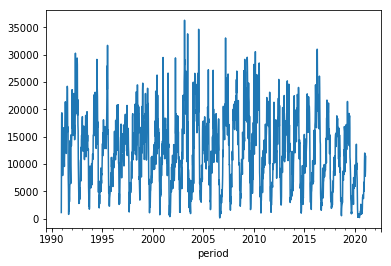

In [12]:
sorted_data['inc'].plot() # premier regard sur les données

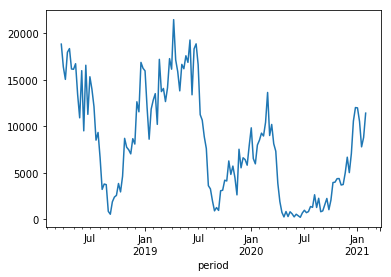

In [15]:
 sorted_data['inc'][-150:].plot()

les creux semblent se situer autour de septembre

# Etude de l'incidence annuelle

In [21]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

In [22]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

AssertionError: 

une erreur est identifiée et correspond à l'année 1990, cette année commençant en septembre et non en decembre. Nous proposons de commencer l'année complete suivant en 1991

In [23]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [24]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

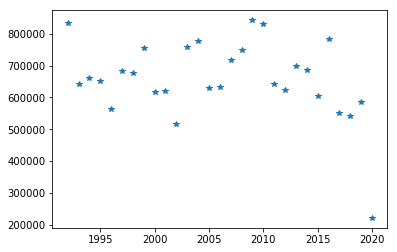

In [25]:
 yearly_incidence.plot(style='*')

In [26]:
 yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64